# IT3301 Applied Machine Learning Assignment
### Jay Krish Vijendra 222197Y
#### About the Dataset: HousePricePredict Inc. is a tech startup specializing in predictive analytics for real estate.Their primary goal is to develop a robust machine learning model that accurately predicts house prices based on various features.

## Table of Contents

<a id='table_of_contents'></a>

1. [Import libraries](#imports)<br>
2. [Import data](#import_data)<br>
3. [Data exploration](#data_exploration)<br>
4. [Data cleaning and preparation](#data_cleaning)<br>
5. [Model training](#model_training)<br>
6. [Tuning](#tuning)<br>
7. [Validation](#validation)<br>

# 1. Import libraries <a id='imports'></a>
[Back to top](#table_of_contents)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from scipy import stats
from scipy.stats import norm, skew 
from scipy.special import boxcox1p

from sklearn.preprocessing import LabelEncoder


In [2]:
from sklearn.linear_model import (
    ElasticNet, Lasso, BayesianRidge, LassoLarsIC, Ridge, RidgeCV, LassoCV, LassoLarsCV, ElasticNetCV
)
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor
)
from sklearn.model_selection import (
    train_test_split, KFold, cross_val_score, GridSearchCV
)

from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from xgboost import XGBRegressor
import numpy as np
import matplotlib.pyplot as plt
import joblib

# 2. Import data <a id='import_data'></a>
[Back to top](#table_of_contents)

In [3]:
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AML-Assignment/Assignment/house_pricing.csv', keep_default_na=True, na_values=['NA','NA'])
df = pd.read_csv('house_pricing.csv', keep_default_na=True, na_values=['NA','NA'])
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 3. Data Exploration <a id='data_exploration'></a>
[Back to top](#table_of_contents)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [6]:
#descriptive statistics summary
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [7]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


C:\Users\User\AppData\Local\Temp\ipykernel_84\1820731706.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'])
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Density'>

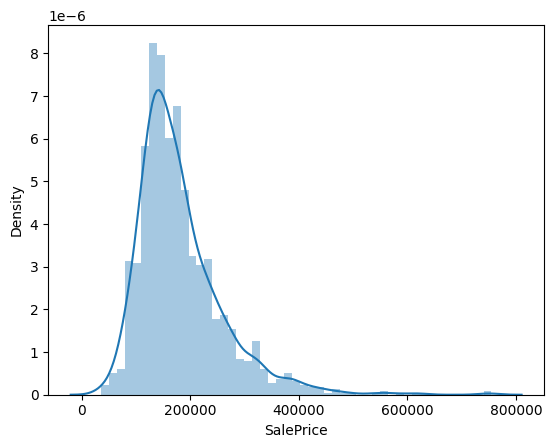

In [8]:
#histogram
sns.distplot(df['SalePrice'])

- Deviation from Normal Distribution: The SalePrice distribution is not symmetrical and does not follow a normal distribution pattern. Instead, it is heavily skewed to the right.
- Positive Skewness: The distribution has a long right tail, showing that there are some houses with very high prices that pull the mean to the right.
- Kurtosis: The distribution is sharply peaked (leptokurtic) around the lower price range, indicating a high concentration of house prices around the mean and significant presence of outliers.

In [9]:
#skewness and kurtosis
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


- Skewness (1.882876): Confirms positive skewness, indicating the presence of a long right tail with many lower-priced houses and a few very high-priced ones.
- Kurtosis (6.536282): Confirms leptokurtic distribution, indicating a sharp peak with high concentration around the mean and heavy tails, meaning there are more extreme values (outliers) than expected in a normal distribution.

C:\Users\User\AppData\Local\Temp\ipykernel_84\2954598470.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], fit=norm)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



 mu = 180921.20 and sigma = 79415.29



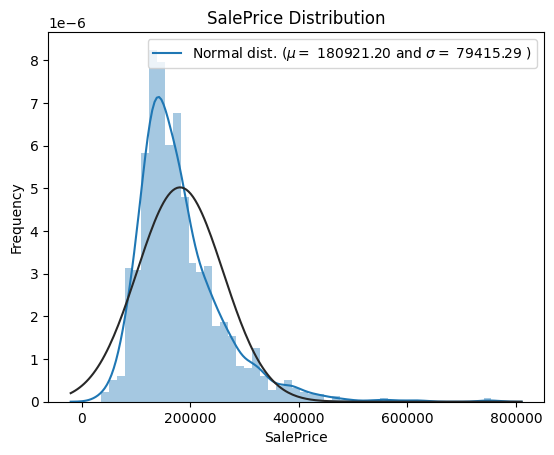

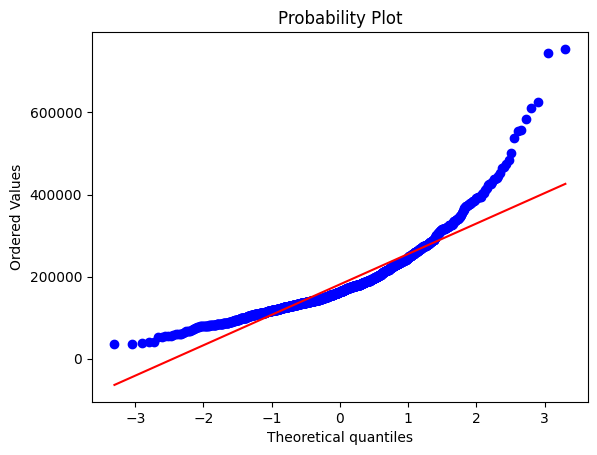

In [10]:
# Plot the original distribution
sns.distplot(df['SalePrice'], fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')

# Get the QQ-plot
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40



C:\Users\User\AppData\Local\Temp\ipykernel_84\2432551931.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], fit=norm)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


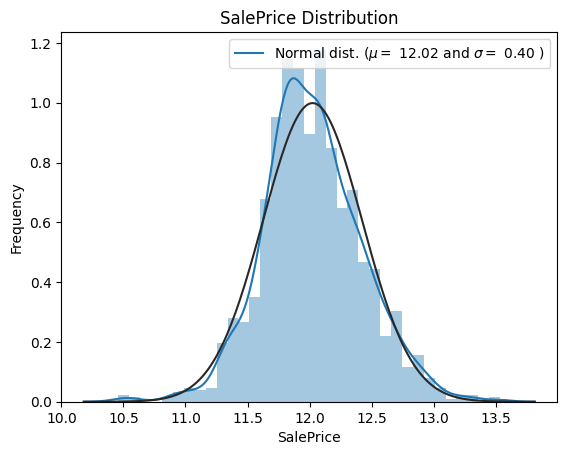

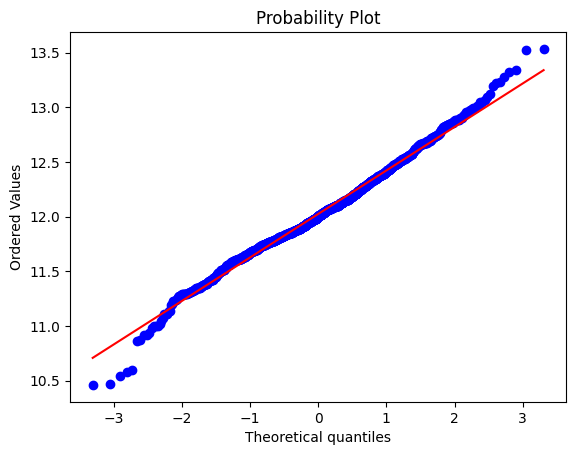

In [11]:
# Apply the log transformation
df["SalePrice"] = np.log1p(df["SalePrice"])

# Plot the new distribution
sns.distplot(df['SalePrice'], fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')

# Get the QQ-plot
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show()

In [12]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220


The transformation from mu = '180921.20' and sigma = '79415.29' to mu = '12.02' and sigma = '0.40' indicates a significant improvement in the distribution of the SalePrice data. The log transformation makes the data more suitable for analysis by reducing skewness and the impact of outliers, leading to a more normal-like distribution with a manageable range of values. This results in better model performance and more reliable statistical analysis.

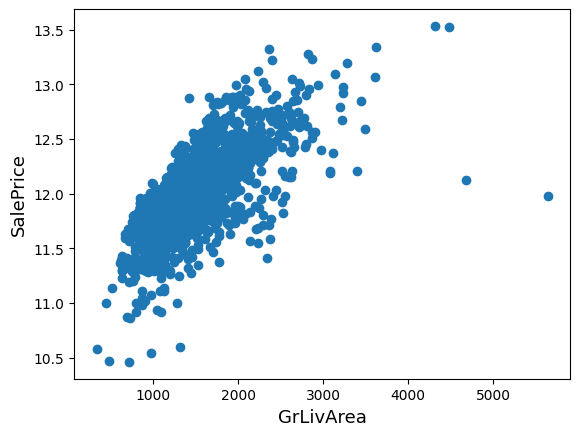

In [13]:
#scatter plot grlivarea/saleprice
fig, ax = plt.subplots()
ax.scatter(x = df['GrLivArea'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

# 4. Data Cleaning and Preparation <a id='data_cleaning'></a>
[Back to top](#table_of_contents)

In [14]:
# Fill missing values

df['Alley'] = df['Alley'].fillna('None')
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)


#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))


# Basement-related columns
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('None')
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF'):
    df[col] = df[col].fillna(0)

# Electrical
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

# FireplaceQu
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')

# Garage-related columns
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[col] = df[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df[col] = df[col].fillna(0)

# PoolQC
df['PoolQC'] = df['PoolQC'].fillna('None')

# Fence
df['Fence'] = df['Fence'].fillna('None')

# MiscFeature
df['MiscFeature'] = df['MiscFeature'].fillna('None')

#MSZoning (The general zoning classification)
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])

#removing ID column
df.drop("Id", axis = 1, inplace = True)

In [15]:
# Check remaining missing values
missing_values = df.isnull().sum().sort_values(ascending=False).head(20)
print(missing_values)

MSSubClass      0
MSZoning        0
GarageYrBlt     0
GarageType      0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
FullBath        0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
GarageFinish    0
dtype: int64


In [16]:
# Display the unique values in the 'Utilities' column before cleaning
print("Unique values in 'Utilities' before cleaning:")
print(df['Utilities'].value_counts())

Unique values in 'Utilities' before cleaning:
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64


Removal of Utilities: Since there is only 1 house with 'NoSewa' in the  dataset, this feature won't help in predictive modelling. We can then safely remove it.

In [17]:
# Remove rows with 'NoSeWa' in the 'Utilities' column
df = df[df['Utilities'] != 'NoSeWa']

df.drop(columns=['Utilities'], inplace=True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,...,0,None,None,None,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,...,0,None,None,None,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,...,0,None,None,None,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,...,0,None,None,None,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,...,0,None,None,None,0,12,2008,WD,Normal,12.429220


In [18]:
# Display the unique values in the 'PoolQC' column before cleaning
print("Unique values in 'PoolQC' before cleaning:")
print(df['PoolQC'].value_counts())

Unique values in 'PoolQC' before cleaning:
PoolQC
None    1452
Gd         3
Ex         2
Fa         2
Name: count, dtype: int64


In [19]:
# Display the unique values in the 'PoolArea' column before cleaning
print("Unique values in 'PoolArea' before cleaning:")
print(df['PoolArea'].value_counts())

Unique values in 'PoolArea' before cleaning:
PoolArea
0      1452
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: count, dtype: int64


Given that there are only 8 rows of data for properties with pools, I would remove these rows. This small sample size could introduce bias and negatively impact the overall dataset's analysis.

In [20]:
# Exclude rows where 'PoolArea' is 0
df = df[df['PoolArea'] == 0]

# Drop the 'PoolArea' and 'PoolQC' columns
df.drop(columns=['PoolArea', 'PoolQC'], inplace=True)

In [21]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,...,0,0,None,None,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,...,0,0,None,None,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,...,0,0,None,None,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,...,0,0,None,None,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,...,0,0,None,None,0,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,None,Reg,Lvl,Inside,Gtl,...,0,0,None,None,0,8,2007,WD,Normal,12.072547
1456,20,RL,85.0,13175,Pave,None,Reg,Lvl,Inside,Gtl,...,0,0,MnPrv,None,0,2,2010,WD,Normal,12.254868
1457,70,RL,66.0,9042,Pave,None,Reg,Lvl,Inside,Gtl,...,0,0,GdPrv,Shed,2500,5,2010,WD,Normal,12.493133
1458,20,RL,68.0,9717,Pave,None,Reg,Lvl,Inside,Gtl,...,0,0,None,None,0,4,2010,WD,Normal,11.864469


In [22]:
#MSSubClass=The building class
df['MSSubClass'] = df['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
df['OverallCond'] = df['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

In [23]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df[c].values)) 
    df[c] = lbl.transform(list(df[c].values))

# shape        
print('Shape all_data: {}'.format(df.shape))

Shape all_data: (1452, 77)


In [24]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,9,RL,65.0,8450,1,1,3,Lvl,Inside,0,...,0,0,4,None,0,4,2,WD,Normal,12.247699
1,4,RL,80.0,9600,1,1,3,Lvl,FR2,0,...,0,0,4,None,0,7,1,WD,Normal,12.109016
2,9,RL,68.0,11250,1,1,0,Lvl,Inside,0,...,0,0,4,None,0,11,2,WD,Normal,12.317171
3,10,RL,60.0,9550,1,1,0,Lvl,Corner,0,...,0,0,4,None,0,4,0,WD,Abnorml,11.849405
4,9,RL,84.0,14260,1,1,0,Lvl,FR2,0,...,0,0,4,None,0,3,2,WD,Normal,12.429220


In [25]:
# Adding total sqfootage feature 
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

In [26]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF
0,9,RL,65.0,8450,1,1,3,Lvl,Inside,0,...,0,4,None,0,4,2,WD,Normal,12.247699,2566
1,4,RL,80.0,9600,1,1,3,Lvl,FR2,0,...,0,4,None,0,7,1,WD,Normal,12.109016,2524
2,9,RL,68.0,11250,1,1,0,Lvl,Inside,0,...,0,4,None,0,11,2,WD,Normal,12.317171,2706
3,10,RL,60.0,9550,1,1,0,Lvl,Corner,0,...,0,4,None,0,4,0,WD,Abnorml,11.849405,2473
4,9,RL,84.0,14260,1,1,0,Lvl,FR2,0,...,0,4,None,0,3,2,WD,Normal,12.429220,3343


In [27]:
numeric_feats = df.dtypes[df.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,24.745570
LotArea,12.487746
3SsnPorch,10.264751
LowQualFinSF,9.242992
LandSlope,4.793904
KitchenAbvGr,4.469701
BsmtFinSF2,4.298274
BsmtHalfBath,4.150757
ScreenPorch,4.089227
EnclosedPorch,2.865891


In [28]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    df[feat] = boxcox1p(df[feat], lam)

There are 58 skewed numerical features to Box Cox transform


In [29]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF
0,2.750250,RL,5.831328,19.212182,0.730463,0.730463,1.540963,Lvl,Inside,0.0,...,0.0,1.820334,None,0.0,1.820334,1.194318,WD,Normal,3.156009,14.976591
1,1.820334,RL,6.221214,19.712205,0.730463,0.730463,1.540963,Lvl,FR2,0.0,...,0.0,1.820334,None,0.0,2.440268,0.730463,WD,Normal,3.140516,14.923100
2,2.750250,RL,5.914940,20.347241,0.730463,0.730463,0.000000,Lvl,Inside,0.0,...,0.0,1.820334,None,0.0,3.011340,1.194318,WD,Normal,3.163719,15.149678
3,2.885846,RL,5.684507,19.691553,0.730463,0.730463,0.000000,Lvl,Corner,0.0,...,0.0,1.820334,None,0.0,1.820334,0.000000,WD,Abnorml,3.111134,14.857121
4,2.750250,RL,6.314735,21.325160,0.730463,0.730463,0.000000,Lvl,FR2,0.0,...,0.0,1.820334,None,0.0,1.540963,1.194318,WD,Normal,3.176081,15.852312


In [30]:
df = pd.get_dummies(df)
df = df.astype(int)

print(df.shape)

(1452, 218)


In [31]:
df.head()

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2,5,19,0,0,1,0,2,1,14,...,0,0,0,1,0,0,0,0,1,0
1,1,6,19,0,0,1,0,2,2,14,...,0,0,0,1,0,0,0,0,1,0
2,2,5,20,0,0,0,0,2,1,14,...,0,0,0,1,0,0,0,0,1,0
3,2,5,19,0,0,0,0,2,1,14,...,0,0,0,1,1,0,0,0,0,0
4,2,6,21,0,0,0,0,2,1,14,...,0,0,0,1,0,0,0,0,1,0


In [32]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


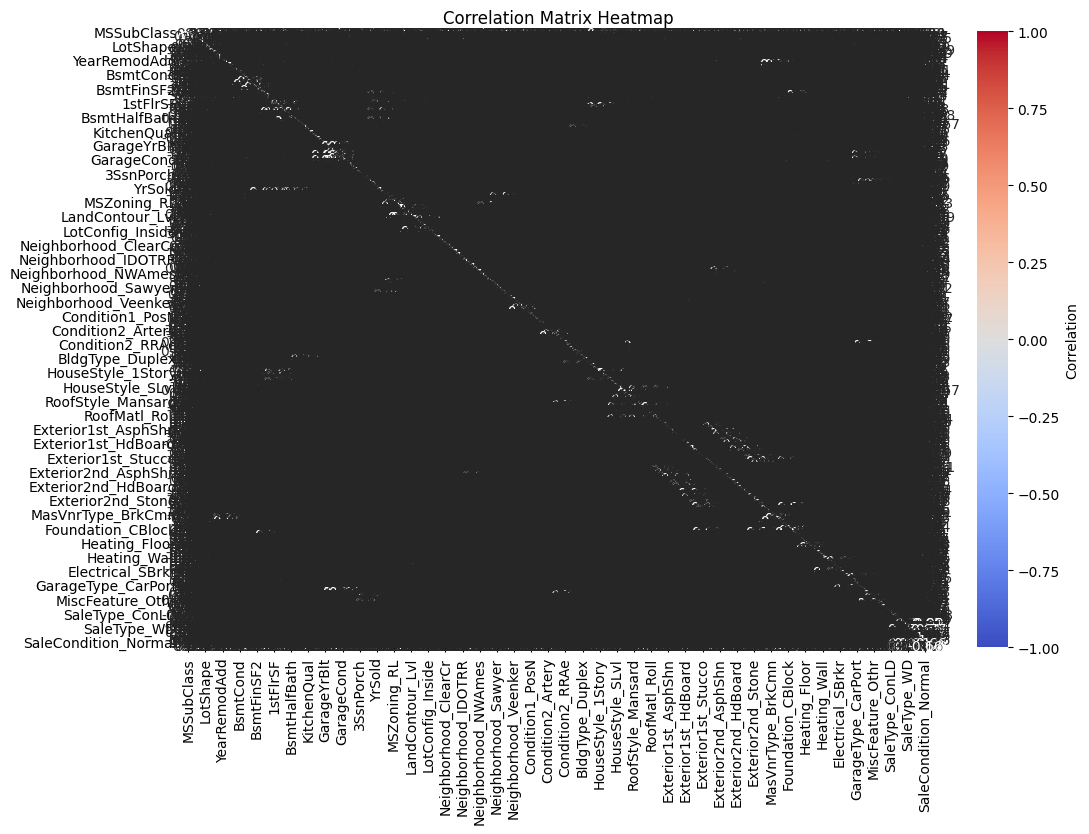

                   Feature        VIF  High VIF
0               MSSubClass  12.487612      True
1              LotFrontage   2.743537      True
2                  LotArea   4.063857      True
3                   Street        NaN     False
4                    Alley   1.703987      True
..                     ...        ...       ...
212  SaleCondition_AdjLand        inf      True
213   SaleCondition_Alloca        inf      True
214   SaleCondition_Family        inf      True
215   SaleCondition_Normal        inf      True
216  SaleCondition_Partial        inf      True

[217 rows x 3 columns]


In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Highlight VIF values greater than 0.5
vif_data['High VIF'] = vif_data['VIF'] > 0.5

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = X.corr()
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", cbar_kws={'label': 'Correlation'})
heatmap.set_title('Correlation Matrix Heatmap')
plt.show()

# Display VIF values
print(vif_data)


In [39]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Step 2: Sort features by VIF and select the top 20
vif_data_sorted = vif_data.sort_values(by="VIF").head(20)
selected_features = vif_data_sorted["Feature"].tolist()

# Print selected features
print("Selected Features:", selected_features)

# Step 3: Rebuild and evaluate the model with selected features
X_selected = df[selected_features]

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Selected Features: ['YearRemodAdd', 'MoSold', 'BsmtCond', 'YrSold', 'Fence', 'ScreenPorch', '3SsnPorch', 'Fireplaces', 'Functional', 'FireplaceQu', 'WoodDeckSF', 'YearBuilt', 'BsmtHalfBath', 'LotShape', 'EnclosedPorch', 'ExterCond', 'Alley', 'OpenPorchSF', 'HalfBath', 'PavedDrive']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Model Training <a id='model_training'></a>
[Back to top](#table_of_contents)

In [33]:
# Define a function to train and evaluate models
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5))
    return rmse

In [34]:
def evaluate_models(models, X_train, y_train):
    results = {}
    for name, model in models.items():
        rmse = rmse_cv(model).mean()
        results[name] = rmse
        print(f"{name}: RMSE = {rmse}")
    return results

In [35]:
# Define models to evaluate
models = {
    'Ridge': Ridge(alpha=75),
    'Lasso': LassoCV(alphas=[1, 0.1, 0.001, 0.0005]),
    'ElasticNet': ElasticNetCV(alphas=[1, 0.1, 0.001, 0.0005]),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='linear', C=1)
}


In [36]:
# Evaluate models
model_results = evaluate_models(models, X_train, y_train)

Ridge: RMSE = 0.06437257954034745
Lasso: RMSE = 0.06702368364275216
ElasticNet: RMSE = 0.06639691823234088
RandomForest: RMSE = 0.07085413007598934
GradientBoosting: RMSE = 0.07872607057016905
XGBoost: RMSE = 0.0858665787348027
SVR: RMSE = 0.09392368693313194


In [37]:
# Compare the results
best_model_name = min(model_results, key=model_results.get)
print(f"Best model: {best_model_name} with RMSE: {model_results[best_model_name]:.4f}")

Best model: Ridge with RMSE: 0.0644


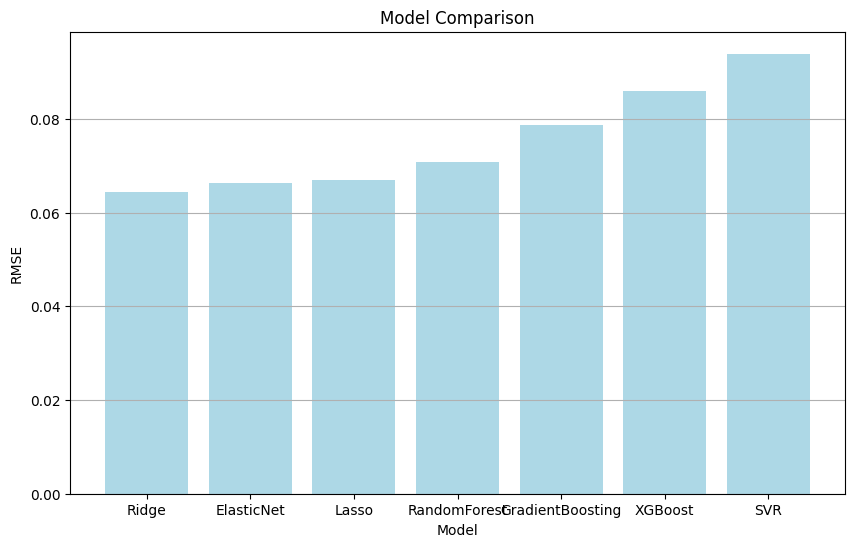

In [38]:
plt.figure(figsize=(10, 6))
sorted_results = dict(sorted(model_results.items(), key=lambda item: item[1]))  # Sort by RMSE
plt.bar(sorted_results.keys(), sorted_results.values(), color='lightblue')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Model Comparison')
plt.grid(axis='y')
plt.show()

# 6. Tuning <a id='tuning'></a>
[Back to top](#table_of_contents)

In [39]:
# Define the parameter grid for Ridge regression
param_grid = {
    'alpha': np.logspace(-4, 4, 10)  # Exploring alpha values on a logarithmic scale
}

# Initialize Ridge regression model
ridge = Ridge()

In [40]:
# Setup GridSearchCV with Ridge and the parameter grid
grid_search = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=5)

In [41]:
# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])},
             scoring='neg_mean_squared_error')

In [42]:
print("\nGrid Search Results:")
results = grid_search.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f"Alpha: {params['alpha']:.4e}, Mean RMSE: {np.sqrt(-mean_score):.4f}")


Grid Search Results:
Alpha: 1.0000e-04, Mean RMSE: 0.0757
Alpha: 7.7426e-04, Mean RMSE: 0.0757
Alpha: 5.9948e-03, Mean RMSE: 0.0756
Alpha: 4.6416e-02, Mean RMSE: 0.0749
Alpha: 3.5938e-01, Mean RMSE: 0.0716
Alpha: 2.7826e+00, Mean RMSE: 0.0661
Alpha: 2.1544e+01, Mean RMSE: 0.0648
Alpha: 1.6681e+02, Mean RMSE: 0.0642
Alpha: 1.2915e+03, Mean RMSE: 0.0643
Alpha: 1.0000e+04, Mean RMSE: 0.0643


In [43]:
# Get the best model and its parameters
best_ridge_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']
best_rmse = np.sqrt(-grid_search.best_score_)

In [44]:
print(f"Best alpha: {best_alpha}")
print(f"Best RMSE: {best_rmse:.4f}")

Best alpha: 166.81005372000558
Best RMSE: 0.0642


# 7. Validation <a id='validation'></a>
[Back to top](#table_of_contents)

### Final Model on the Test Set

In [45]:
# Fit the final model with the best alpha on the entire training set
final_model = Ridge(alpha=best_alpha)
final_model.fit(X_train, y_train)

# Predict on the test set
y_pred = final_model.predict(X_test)

# Compute RMSE on the test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Test RMSE: {test_rmse:.4f}")

Test RMSE: 0.0799


## Evaluation of the Final Model

### Test RMSE: 0.0799

**Root Mean Squared Error (RMSE)** is a key metric used to evaluate the performance of regression models. It measures the average magnitude of the prediction errors between the actual and predicted values. Lower RMSE values indicate better model performance, with fewer discrepancies between predictions and true values.

### Why the Final Model is Good:

1. **Low Test RMSE:**
   - The final model's RMSE on the test set is **0.0799**, which reflects the average prediction error. This value is relatively low, suggesting that the model performs well in making accurate predictions on unseen data.

2. **Generalization:**
   - The test RMSE is calculated on data that was not used during the training or hyperparameter tuning process. This ensures that the performance measurement is unbiased and reflects how well the model generalizes to new, unseen examples.

3. **Performance Consistency:**
   - The low RMSE indicates that the model's predictions are consistently close to the actual values, which is a sign of good performance. This level of accuracy is desirable in many real-world applications where precise predictions are important.

4. **Impact of Regularization:**
   - The model was tuned using Ridge regression, which includes a regularization parameter (`alpha`) that controls the complexity of the model. The final `alpha` value found through hyperparameter tuning helped achieve this low RMSE by balancing model fit and regularization.

5. **Comparison to Baseline:**
   - If compared to baseline models or previous iterations, this RMSE should be lower, indicating an improvement in predictive performance. Even if there's no explicit baseline provided, achieving a low RMSE typically signifies that the model is effective and reliable.

### Conclusion:

The final model's **test RMSE of 0.0799** demonstrates strong predictive performance, reflecting its ability to generalize well to new data. The low error margin suggests that the model's predictions are both accurate and consistent, making it a robust choice for the given regression task.

### Extra Features

Below, I made use of the GPT-4 Omni model to develop a system for estimating house prices based on user queries. The core of the system involves parsing user queries to extract relevant feature values using the GPT-4 Omni model. I created a function that prompts the model to identify and format these feature values from the query. The extracted values are then mapped to the model's input features, using default mean or mode values where specific data is not provided.

For price prediction, I developed a function that applies these extracted features to predict house prices using the model.

For more information about the GPT-4 Omni model and its capabilities, you can refer to the official documentation [Link](https://openai.com/index/gpt-4o-mini-advancing-cost-efficient-intelligence/).

In [46]:
import json

# Get feature names from the DataFrame
feature_names = X.columns.tolist()

with open('features.json', 'w') as f:
    json.dump(feature_names, f)

In [47]:
# Assuming X_train is your training dataset
mean_mode_dict = {}

for column in X_train.columns:
        mean_mode_dict[column] = X_train[column].mean().item()
else:
    mean_mode_dict[column] = X_train[column].mode().item()

# Save to a JSON file
with open('mean_mode.json', 'w') as f:
    json.dump(mean_mode_dict, f)


In [48]:
import openai
import dotenv

# Load environment variables
dotenv.load_dotenv()

# Set up API key
openai.api_key = dotenv.get_key('.env', 'OPENAI_API_KEY')

# Load feature names
with open('features.json', 'r') as f:
    feature_names = json.load(f)

# Load mean/mode values
with open('mean_mode.json', 'r') as f:
    mean_mode_values = json.load(f)

# Function to parse the query using LLM
def parse_query(query):
    messages = [
        {"role": "system", "content": "You are a helpful assistant who extracts and formats feature values from queries about house prices."},
        {"role": "user", "content": f"Extract the values for the following features from the query: {', '.join(feature_names)}. Query: '{query}'"}
    ]
    
    response = openai.ChatCompletion.create(
        model="gpt-4o-mini",  # Use the specific model you are working with
        messages=messages,
        max_tokens=150
    )
    
    return response.choices[0].message['content'].strip()

# Function to map parsed parameters to model features
def map_parameters_to_features(parsed_parameters, feature_names, mean_mode_values):
    # Initialize features with mean/mode values
    features = {name: mean_mode_values[name] for name in feature_names}
    
    # Example parsing; adjust based on how LLM returns parameters
    params = parsed_parameters.split(',')
    for param in params:
        name_value = param.split(':')
        if len(name_value) == 2 and name_value[0].strip() in features:
            features[name_value[0].strip()] = float(name_value[1].strip())  # Adjust parsing as needed

    return features

# Function to predict house price using the model
def predict_house_price(features, model):
    feature_list = [features.get(name, 0) for name in feature_names]
    log_predicted_price = model.predict([feature_list])[0]

    # Transformation parameter (lambda)
    lambda_param = 0.10
    log_transformed_values = np.power((log_predicted_price * lambda_param + 1), 1 / lambda_param) - 1
    
    predicted_price = np.expm1(log_transformed_values)
    return predicted_price

# Function to generate a response
def generate_response(predicted_price):
    return f"The estimated price of the house is ${predicted_price:,.2f}."

# Function to process the query
def process_query(query, model):
    parsed_parameters = parse_query(query)
    features = map_parameters_to_features(parsed_parameters, feature_names, mean_mode_values)
    price = predict_house_price(features, model)
    return generate_response(price)

query = "What is average price of a house in the neighbourhood of CollgCr?"


response = process_query(query, final_model)
print(response)

The estimated price of the house is $340,964.41.


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
